In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_excel("data.xlsx", index_col=0)

In [4]:
print(df.columns)

Index(['USGG1M Index', 'USGG3M Index', 'USGG6M Index', 'USGG2YR Index',
       'USGG3YR Index', 'USGG5YR Index', 'USGG10YR Index', 'USGG30YR Index',
       'USYC2Y10Y Index', 'USYC3M10Y Index', 'USGGBE02 Index',
       'USGGBE05 Index', 'USGGBE10 Index', 'USGGBE30 Index', 'USGGT05Y Index',
       'MOVE Index', 'DXY Index', 'EURUSD Curncy', 'GBPUSD Curncy',
       'USDJPY Curncy', 'USDMXN Curncy', 'SPX Index', 'NDX Index', 'RTY Index',
       'MXWO Index', 'VIX Index', 'VIX3M Index', 'SKEW Index', 'PUT Index',
       'CL1 Comdty', 'CO1 Comdty', 'NG1 Comdty', 'XAU Curncy', 'XAG Curncy',
       'LOCADY Index', 'BDIY Index', 'GSCPI Index', 'BFCIUS Index'],
      dtype='object')


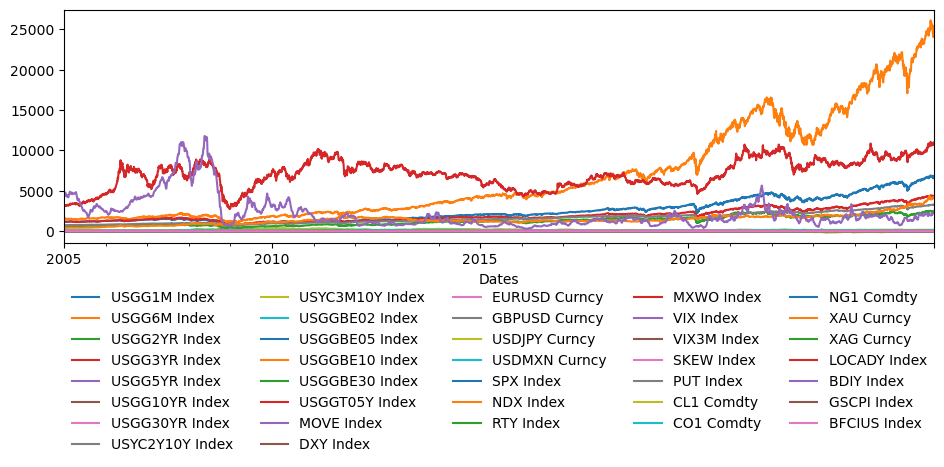

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
df.plot(ax=ax)

ax.legend(
    ncols=5,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    frameon=False
)
plt.tight_layout()


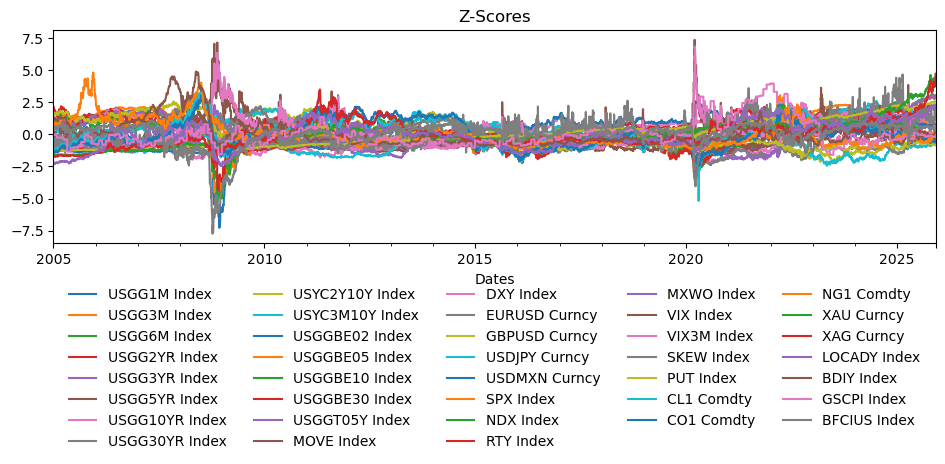

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Ensure numeric ---
df2 = df.apply(pd.to_numeric, errors='coerce')

# --- Drop rows where everything is NaN ---
df2 = df2.dropna(how='all')

# --- Z-score standardization: raw → standardized ---
# (each column: (x - mean) / std)
df_std = (df2 - df2.mean()) / df2.std()

fig, ax = plt.subplots(figsize=(10, 5))
df_std.plot(ax=ax)

ax.legend(
    ncols=5,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    frameon=False
)
ax.set_title("Z-Scores")
plt.tight_layout()


In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Keep only numeric macro columns
df_num = df.select_dtypes(include=['number'])

# Differences (NOT scaling)
rets = df_num.diff().dropna()

# PCA
pca = PCA(n_components=5)
PCs = pca.fit_transform(rets.values)

rets_pca = pd.DataFrame(
    PCs,
    index=rets.index,
    columns=[f'PC{i+1}' for i in range(5)]
)
rets_pca.head()


,PC1,PC2,PC3,PC4,PC5
Dates,,,,,
2005-01-04,-74.073110,-137.407785,-138.599432,-7.588111,0.545496
2005-01-05,-29.586585,-59.324212,-59.326233,-8.160397,-0.247236
2005-01-06,-3.860191,23.478188,9.676618,5.095144,-6.507123
2005-01-07,7.820869,32.850380,79.542156,-9.180428,-3.213006
2005-01-10,-3.938668,3.954890,142.329715,7.304140,-0.234221


In [13]:
import matplotlib.pyplot as plt

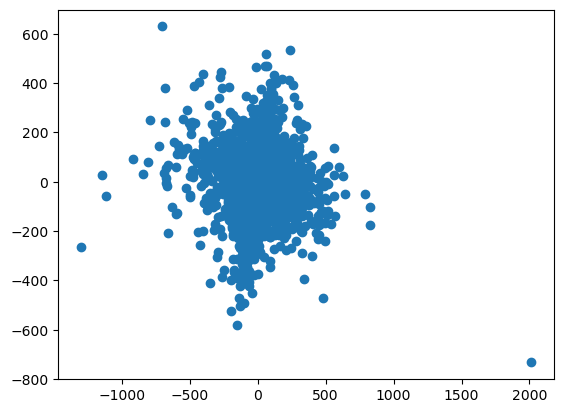

In [15]:
plt.scatter(rets_pca.iloc[:,0],rets_pca.iloc[:,1])

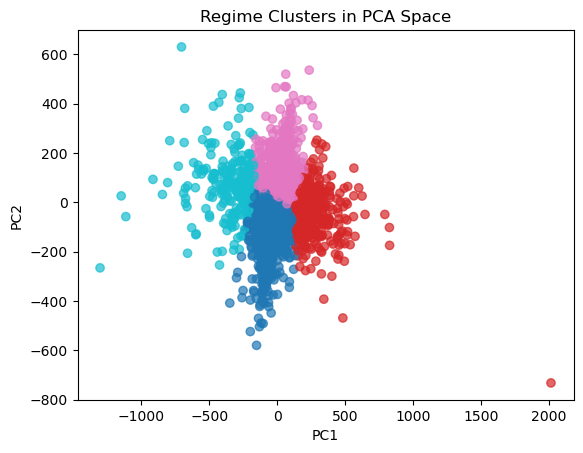

In [16]:
from sklearn.cluster import KMeans

X = rets_pca[['PC1','PC2','PC3']].values
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
rets_pca['Regime'] = kmeans.labels_

plt.scatter(
    rets_pca['PC1'],
    rets_pca['PC2'],
    c=rets_pca['Regime'],
    cmap='tab10',
    alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Regime Clusters in PCA Space")
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


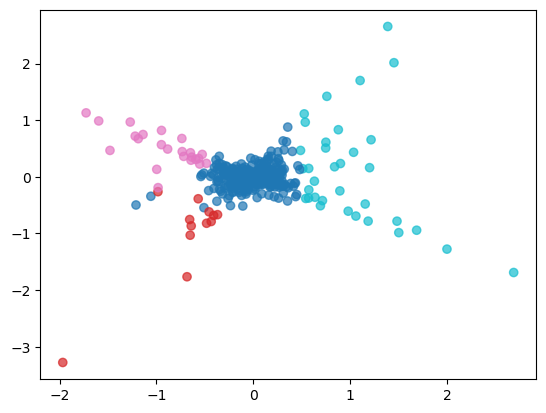

In [19]:
rets = np.log(df_num).diff().dropna()

# PCA
pca = PCA(n_components=5)
PCs = pca.fit_transform(rets.values)

rets_pca = pd.DataFrame(
    PCs, index=rets.index,
    columns=[f'PC{i+1}' for i in range(5)]
)

# KMeans
from sklearn.cluster import KMeans

X = rets_pca[['PC1','PC2','PC3']].values
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
rets_pca['Regime'] = kmeans.labels_

# Plot
plt.scatter(rets_pca['PC1'], rets_pca['PC2'], c=rets_pca['Regime'], cmap='tab10', alpha=0.7)
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


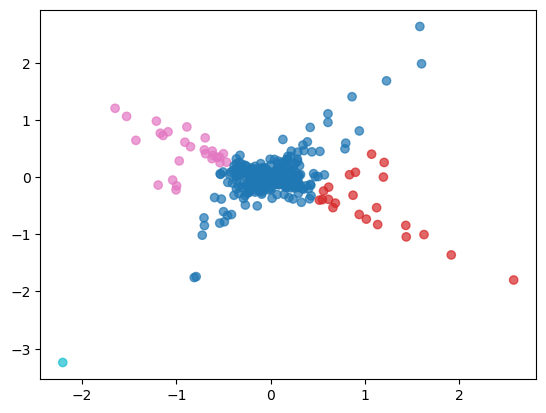

In [20]:
eps = 1e-6
rets = np.log(df_num + eps).diff().dropna()

# PCA
pca = PCA(n_components=5)
PCs = pca.fit_transform(rets.values)

rets_pca = pd.DataFrame(
    PCs, index=rets.index,
    columns=[f'PC{i+1}' for i in range(5)]
)

# KMeans
from sklearn.cluster import KMeans

X = rets_pca[['PC1','PC2','PC3']].values
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
rets_pca['Regime'] = kmeans.labels_

# Plot
plt.scatter(rets_pca['PC1'], rets_pca['PC2'], c=rets_pca['Regime'], cmap='tab10', alpha=0.7)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


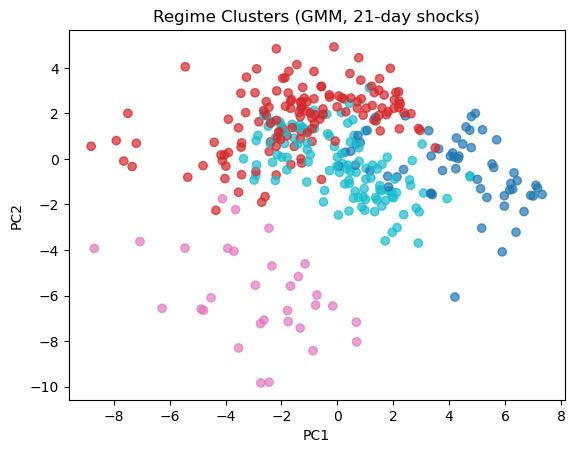

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

eps = 1e-6
df_log = np.log(df_num + eps)

# 21-day macro regime shocks (key change!)
rets = df_log.diff(21).dropna()

# Standardize macro shocks
X = StandardScaler().fit_transform(rets.values)

# PCA
pca = PCA(n_components=5)
PCs = pca.fit_transform(X)

rets_pca = pd.DataFrame(PCs, index=rets.index,
                        columns=[f"PC{i+1}" for i in range(5)])

# Gaussian Mixture Model (much better than KMeans)
gmm = GaussianMixture(n_components=4, covariance_type='full',
                      random_state=42)
rets_pca['Regime'] = gmm.fit_predict(PCs)

# Plot
plt.scatter(rets_pca['PC1'], rets_pca['PC2'], 
            c=rets_pca['Regime'], cmap='tab10', alpha=0.7)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("Regime Clusters (GMM, 21-day shocks)")
plt.show()


In [22]:
regime_summary = rets.groupby(rets_pca['Regime']).mean()
regime_summary


,USGG1M Index,USGG6M Index,USGG2YR Index,USGG3YR Index,USGG5YR Index,USGG10YR Index,USGG30YR Index,USYC2Y10Y Index,USYC3M10Y Index,USGGBE02 Index,...,PUT Index,CL1 Comdty,CO1 Comdty,NG1 Comdty,XAU Curncy,XAG Curncy,LOCADY Index,BDIY Index,GSCPI Index,BFCIUS Index
Regime,,,,,,,,,,,,,,,,,,,,,
0,0.033589,0.052259,0.067956,0.068273,0.062822,0.049520,0.025825,0.053107,0.113541,0.165962,...,0.008492,0.074996,0.070692,0.044232,0.021573,0.020599,0.029536,-0.094751,0.159909,0.349535
1,0.006718,-0.009382,-0.026337,-0.032174,-0.033548,-0.029973,-0.021096,-0.029732,-0.243150,0.011834,...,0.009596,0.003104,0.013335,-0.026948,0.003241,0.002537,0.013886,0.086936,-0.361421,0.120431
2,0.061991,0.071151,0.041322,0.048888,0.045239,0.052494,0.052427,-0.163189,-0.062813,0.029861,...,-0.029743,-0.019233,-0.028770,-0.078362,-0.010196,-0.037556,0.019720,0.031278,-0.251883,-1.269238
3,0.059821,0.057425,0.058675,0.050940,0.037678,0.020391,0.007067,-0.120132,-0.025934,-0.020093,...,0.009406,0.033255,0.028276,-0.011459,-0.015670,-0.032167,-0.018484,0.034059,0.122007,0.129895


In [23]:
regime_vol = rets.groupby(rets_pca['Regime']).std()
regime_vol


,USGG1M Index,USGG6M Index,USGG2YR Index,USGG3YR Index,USGG5YR Index,USGG10YR Index,USGG30YR Index,USYC2Y10Y Index,USYC3M10Y Index,USGGBE02 Index,...,PUT Index,CL1 Comdty,CO1 Comdty,NG1 Comdty,XAU Curncy,XAG Curncy,LOCADY Index,BDIY Index,GSCPI Index,BFCIUS Index
Regime,,,,,,,,,,,,,,,,,,,,,
0,0.051460,0.032481,0.033995,0.033861,0.033197,0.039113,0.033398,0.236691,0.267434,0.085127,...,0.003616,0.028861,0.027229,0.107706,0.024148,0.036450,0.035585,0.156390,0.658469,0.479635
1,0.043443,0.023511,0.028342,0.030454,0.030833,0.029575,0.027402,0.194952,0.819531,0.102452,...,0.008537,0.065003,0.051354,0.085177,0.023718,0.038053,0.045660,0.157615,0.883050,0.697941
2,0.039590,0.047358,0.026088,0.037915,0.037640,0.046920,0.041522,0.800500,0.209018,0.069508,...,0.014221,0.038631,0.043832,0.155521,0.033825,0.065169,0.043074,0.081251,0.567492,0.911168
3,0.051165,0.034151,0.037606,0.039816,0.043036,0.041953,0.040894,0.191319,0.125409,0.088452,...,0.006357,0.058331,0.052056,0.072817,0.016800,0.029886,0.058108,0.134781,0.384896,0.844594


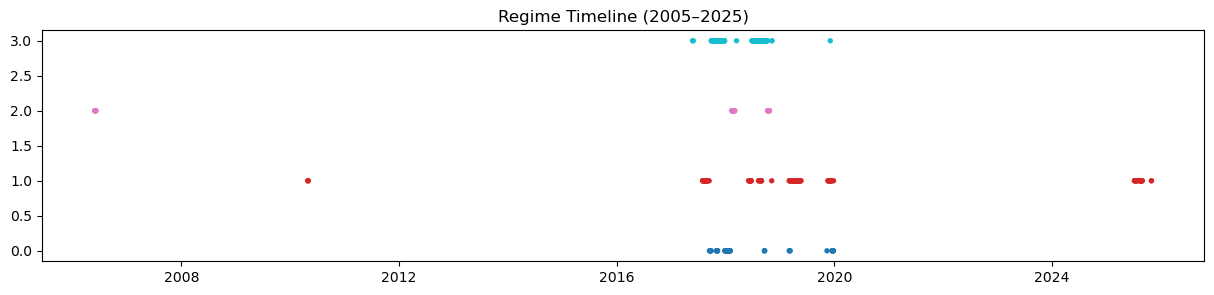

In [24]:
plt.figure(figsize=(15,3))
plt.scatter(rets_pca.index, rets_pca['Regime'], 
            c=rets_pca['Regime'], cmap='tab10', s=8)
plt.title("Regime Timeline (2005–2025)")
plt.show()


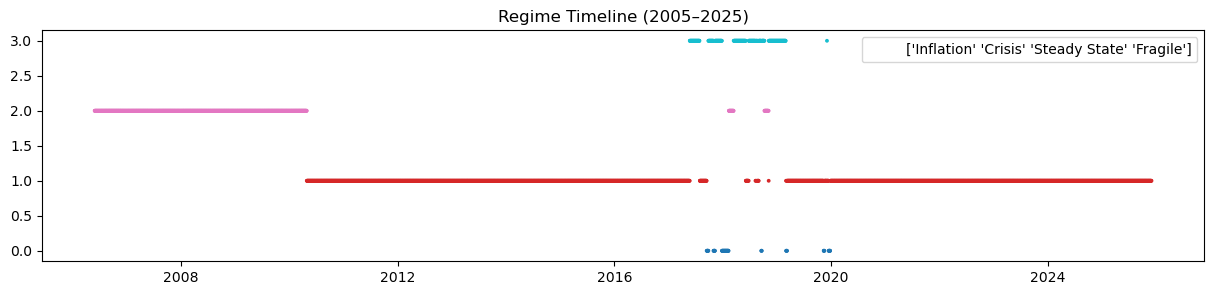

In [29]:
label_map = {
    1: "Crisis",
    2: "Inflation",
    3: "Steady State",
    0: "Fragile"
}

rets_pca['RegimeName'] = rets_pca['Regime'].map(label_map)

daily_regimes = pd.DataFrame(index=df.index)
daily_regimes['Regime'] = rets_pca['Regime'].reindex(daily_regimes.index, method='ffill')
daily_regimes['RegimeName'] = rets_pca['RegimeName'].reindex(daily_regimes.index, method='ffill')
plt.figure(figsize=(15,3))
plt.scatter(
    daily_regimes.index,
    daily_regimes['Regime'],
    c=daily_regimes['Regime'],
    cmap='tab10',
    s=3,
    label=rets_pca['RegimeName'].unique()
)
plt.title("Regime Timeline (2005–2025)")
plt.legend()
plt.show()


In [34]:
label_map

{1: 'Crisis', 2: 'Inflation', 3: 'Steady State', 0: 'Fragile'}

In [35]:
unique_regs

array([nan,  2.,  1.,  3.,  0.])